Setting a right price of products/services is one of the most important decisions a business can make. Under-pricing (and over-pricing) can hurt a company’s bottom line. Two determinants/indicators of business revenue are product prices and quantity sold. At higher price revenue is expected to be higher, if quantity sold is constant. However we know from our everyday experience that price and quantity are inversely related – as the price of something goes up, people show less intent to buy it.

The opposite is also true, that is, as price goes down, sales go up (that’s why we big “sale” events in shopping malls round the year). But that doesn’t mean that the revenue will always go up.

So an important question to ask is: if higher price means sales down and at lower price revenue goes down then where is the sweet spot, the right price, that maximizes revenue? With a simple example we'll examine how to optimization price to maximize revenue and profit.


### Import libraries

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
%matplotlib inline

### Data
Data in this analysis comes from [here](susanli2016/Machine-Learning-with-Python/master/beef.csv) [Susan Li has a nice [blog post](https://towardsdatascience.com/calculating-price-elasticity-of-demand-statistical-modeling-with-python-6adb2fa7824d) about price elasticity of demand (i.e. sensitivity of demand to change in price) explained using the same dataset]. This is a time series, quarterly dataset of beef sales (quantity) and corresponding price.

This dataset will be used first to find price elasticity of demand and then to find at what price the profit is maximized.

In [2]:
# Load data
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')

In [3]:
# View first few rows
beef.tail(5)

,Year,Quarter,Quantity,Price
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667
90,1999,3,17.6689,289.2333


### Step 1: Define the profit function

We know,
       
        profit = revenue - cost (1)  


We also know, 
        
        revenue = qt_demanded * price (2)

Therefore,  
        
        profit = qt_demanded * price - cost (3)

### Step 2: Define the demand function 
Assuming that the cost is constant, we first need to estblish the relationship between qt_demanded and price: 


        qt_demanded = f(price) (4)

This demand function can be estimated based on hitorical price and corresponding sales data.

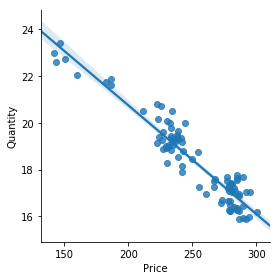

In [4]:
# demand curve estimation
sns.lmplot( x="Price", y="Quantity", data=beef, fit_reg=True, size=4)

In [5]:
# fit OLS model
model = ols("Quantity ~ Price", data=beef).fit()
# print model summary 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.69e-46
Time:                        18:13:59   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

### Step 3: Parameterize the profit function in step 1
The demand function with parameter values coming from the above regression:

        qt_demanded=30.05-0.0465*price (5)
Therefore, the profit function in equation (3) becomes

        profit = (30.05-0.0465*price)*price - cost (6)

### Step 4: Finding the price that maximizes profit

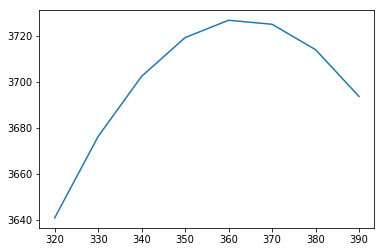

In [7]:
Price = [320, 330,340,350, 360, 370, 380, 390] # a range of diffferent prices to find the optimum one
cost = 80 # a fixed cost in this case
Revenue = []
for i in Price:
    quantity_demanded=30.05-0.0465*i
    Revenue.append((i-cost)*quantity_demanded) # profit function

# create data frame of price and revenue 
profit=pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
plt.plot(profit["Price"], profit["Revenue"])

In [8]:
# price at which the revenue is maximum
profit[profit['Revenue'] == profit['Revenue'].max()]

#profit.loc[profit['Revenue'].idxmax()]

,Price,Revenue
4,360,3726.8


So USD 360 is the price, from a lis tof  prices, at which the profit is maximized. We used a price interval of USD 10, this could  be any number that gives the right outcome. 